Imorting dependenciees

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

Data loading and Understanding

In [ ]:
# load teh csv data to a pandas dataframe
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
#checking
df.shape
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pd.set_option("display.max_columns", None)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df = df.drop(columns=["customerID"], errors='ignore')


In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(df["gender"].unique())

['Female' 'Male']


In [ ]:
#printing unique values in all columns
numerical_feature_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
  if col  not in numerical_feature_list:
    print(col ,df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
len(df[df["TotalCharges"] == " "])

11

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

 SQL Data Aggregation

In [ ]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(':memory:')
df.to_sql('telecom_data', conn, index=False, if_exists='replace')

# 1. Average Monthly Charges per Contract Type
q1 = """
SELECT Contract, AVG(MonthlyCharges) AS avg_monthly_charges
FROM telecom_data
GROUP BY Contract
"""
res1 = pd.read_sql_query(q1, conn)
print(res1)

# 2. Total Customers per Payment Method
q2 = """
SELECT PaymentMethod, COUNT(*) AS total_customers
FROM telecom_data
GROUP BY PaymentMethod
"""
res2 = pd.read_sql_query(q2, conn)
print(res2)

# 3. Average Tenure per Internet Service Type
q3 = """
SELECT InternetService, AVG(tenure) AS avg_tenure
FROM telecom_data
GROUP BY InternetService
"""
res3 = pd.read_sql_query(q3, conn)
print(res3)

# 4. Churn Rate by Contract
q4 = """
SELECT Contract,
       SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*1.0/COUNT(*) AS churn_rate
FROM telecom_data
GROUP BY Contract
"""
res4 = pd.read_sql_query(q4, conn)
print(res4)

# 5. Churn Rate by Payment Method
q5 = """
SELECT PaymentMethod,
       SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*1.0/COUNT(*) AS churn_rate
FROM telecom_data
GROUP BY PaymentMethod
"""
res5 = pd.read_sql_query(q5, conn)
print(res5)

# 6. Churn Rate by Internet Service
q6 = """
SELECT InternetService,
       SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*1.0/COUNT(*) AS churn_rate
FROM telecom_data
GROUP BY InternetService
"""
res6 = pd.read_sql_query(q6, conn)
print(res6)

# 7. Churn Rate by Gender
q7 = """
SELECT gender,
       SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*1.0/COUNT(*) AS churn_rate
FROM telecom_data
GROUP BY gender
"""
res7 = pd.read_sql_query(q7, conn)
print(res7)

# 8. Churn Rate by Senior Citizen Status
q8 = """
SELECT SeniorCitizen,
       SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*1.0/COUNT(*) AS churn_rate
FROM telecom_data
GROUP BY SeniorCitizen
"""
res8 = pd.read_sql_query(q8, conn)
print(res8)

# 9. Customers and Churn Rate by Tenure Bucket
q9 = """
SELECT
  CASE
    WHEN tenure BETWEEN 0 AND 12 THEN '0–12'
    WHEN tenure BETWEEN 13 AND 24 THEN '13–24'
    WHEN tenure BETWEEN 25 AND 48 THEN '25–48'
    ELSE '49+'
  END AS tenure_bucket,
  COUNT(*) AS customers,
  SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*1.0/COUNT(*) AS churn_rate
FROM telecom_data
GROUP BY tenure_bucket
"""
res9 = pd.read_sql_query(q9, conn)
print(res9)

# 10. Churn Rate by Service Features
features = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feat in features:
    q = f"""
    SELECT {feat},
           SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*1.0/COUNT(*) AS churn_rate
    FROM telecom_data
    GROUP BY {feat}
    """
    print(f"\n{feat} churn rate:")
    print(pd.read_sql_query(q, conn))


   Contract  avg_monthly_charges
0         0            66.398490
1         1            65.048608
2         2            60.770413
   PaymentMethod  total_customers
0              0             1544
1              1             1522
2              2             2365
3              3             1612
   InternetService  avg_tenure
0                0   32.821561
1                1   32.917959
2                2   30.547182
   Contract  churn_rate
0         0         0.0
1         1         0.0
2         2         0.0
   PaymentMethod  churn_rate
0              0         0.0
1              1         0.0
2              2         0.0
3              3         0.0
   InternetService  churn_rate
0                0         0.0
1                1         0.0
2                2         0.0
   gender  churn_rate
0       0         0.0
1       1         0.0
   SeniorCitizen  churn_rate
0              0         0.0
1              1         0.0
  tenure_bucket  customers  churn_rate
0          0–12  

EDA

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [ ]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

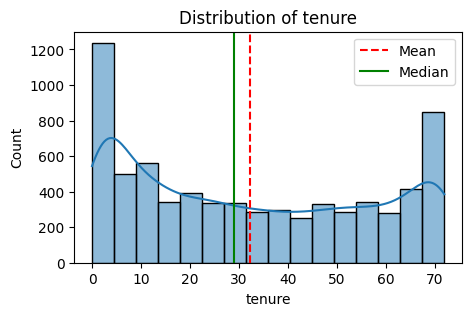

In [ ]:
plot_histogram(df, "tenure")

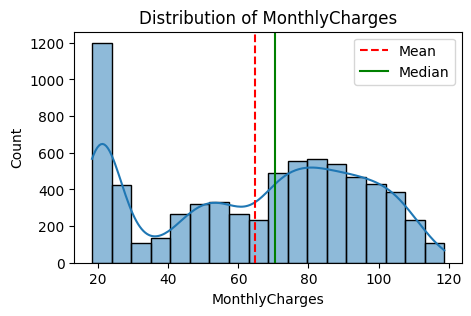

In [ ]:
plot_histogram(df, "MonthlyCharges")

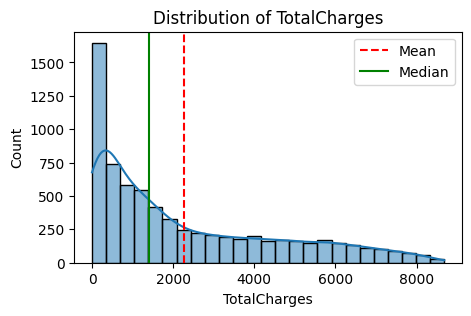

In [ ]:
plot_histogram(df, "TotalCharges")

**Box plot for numerical features**

In [ ]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

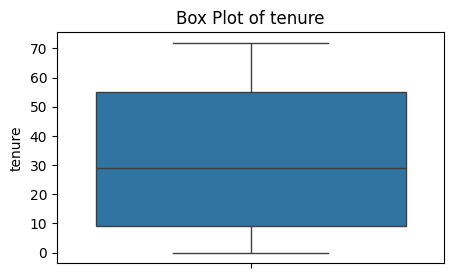

In [ ]:
plot_boxplot(df, "tenure")

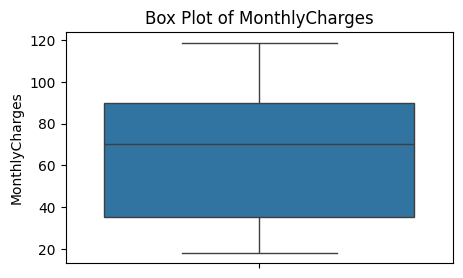

In [ ]:
plot_boxplot(df, "MonthlyCharges")

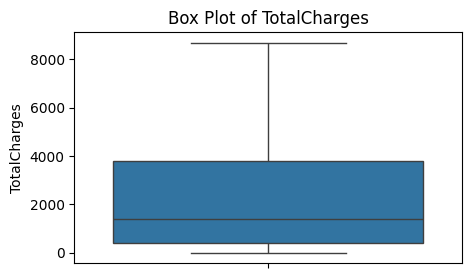

In [ ]:
plot_boxplot(df, "TotalCharges")

**Correlation Heatmap for numerical columns**

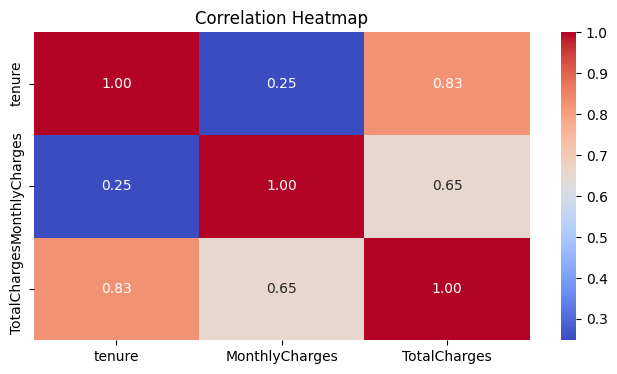

In [ ]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Counterplots for categorical columns

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()

# If "SeniorCitizen" is not an object column but you want to include it:
if "SeniorCitizen" not in object_cols:
    object_cols = ["SeniorCitizen"] + object_cols


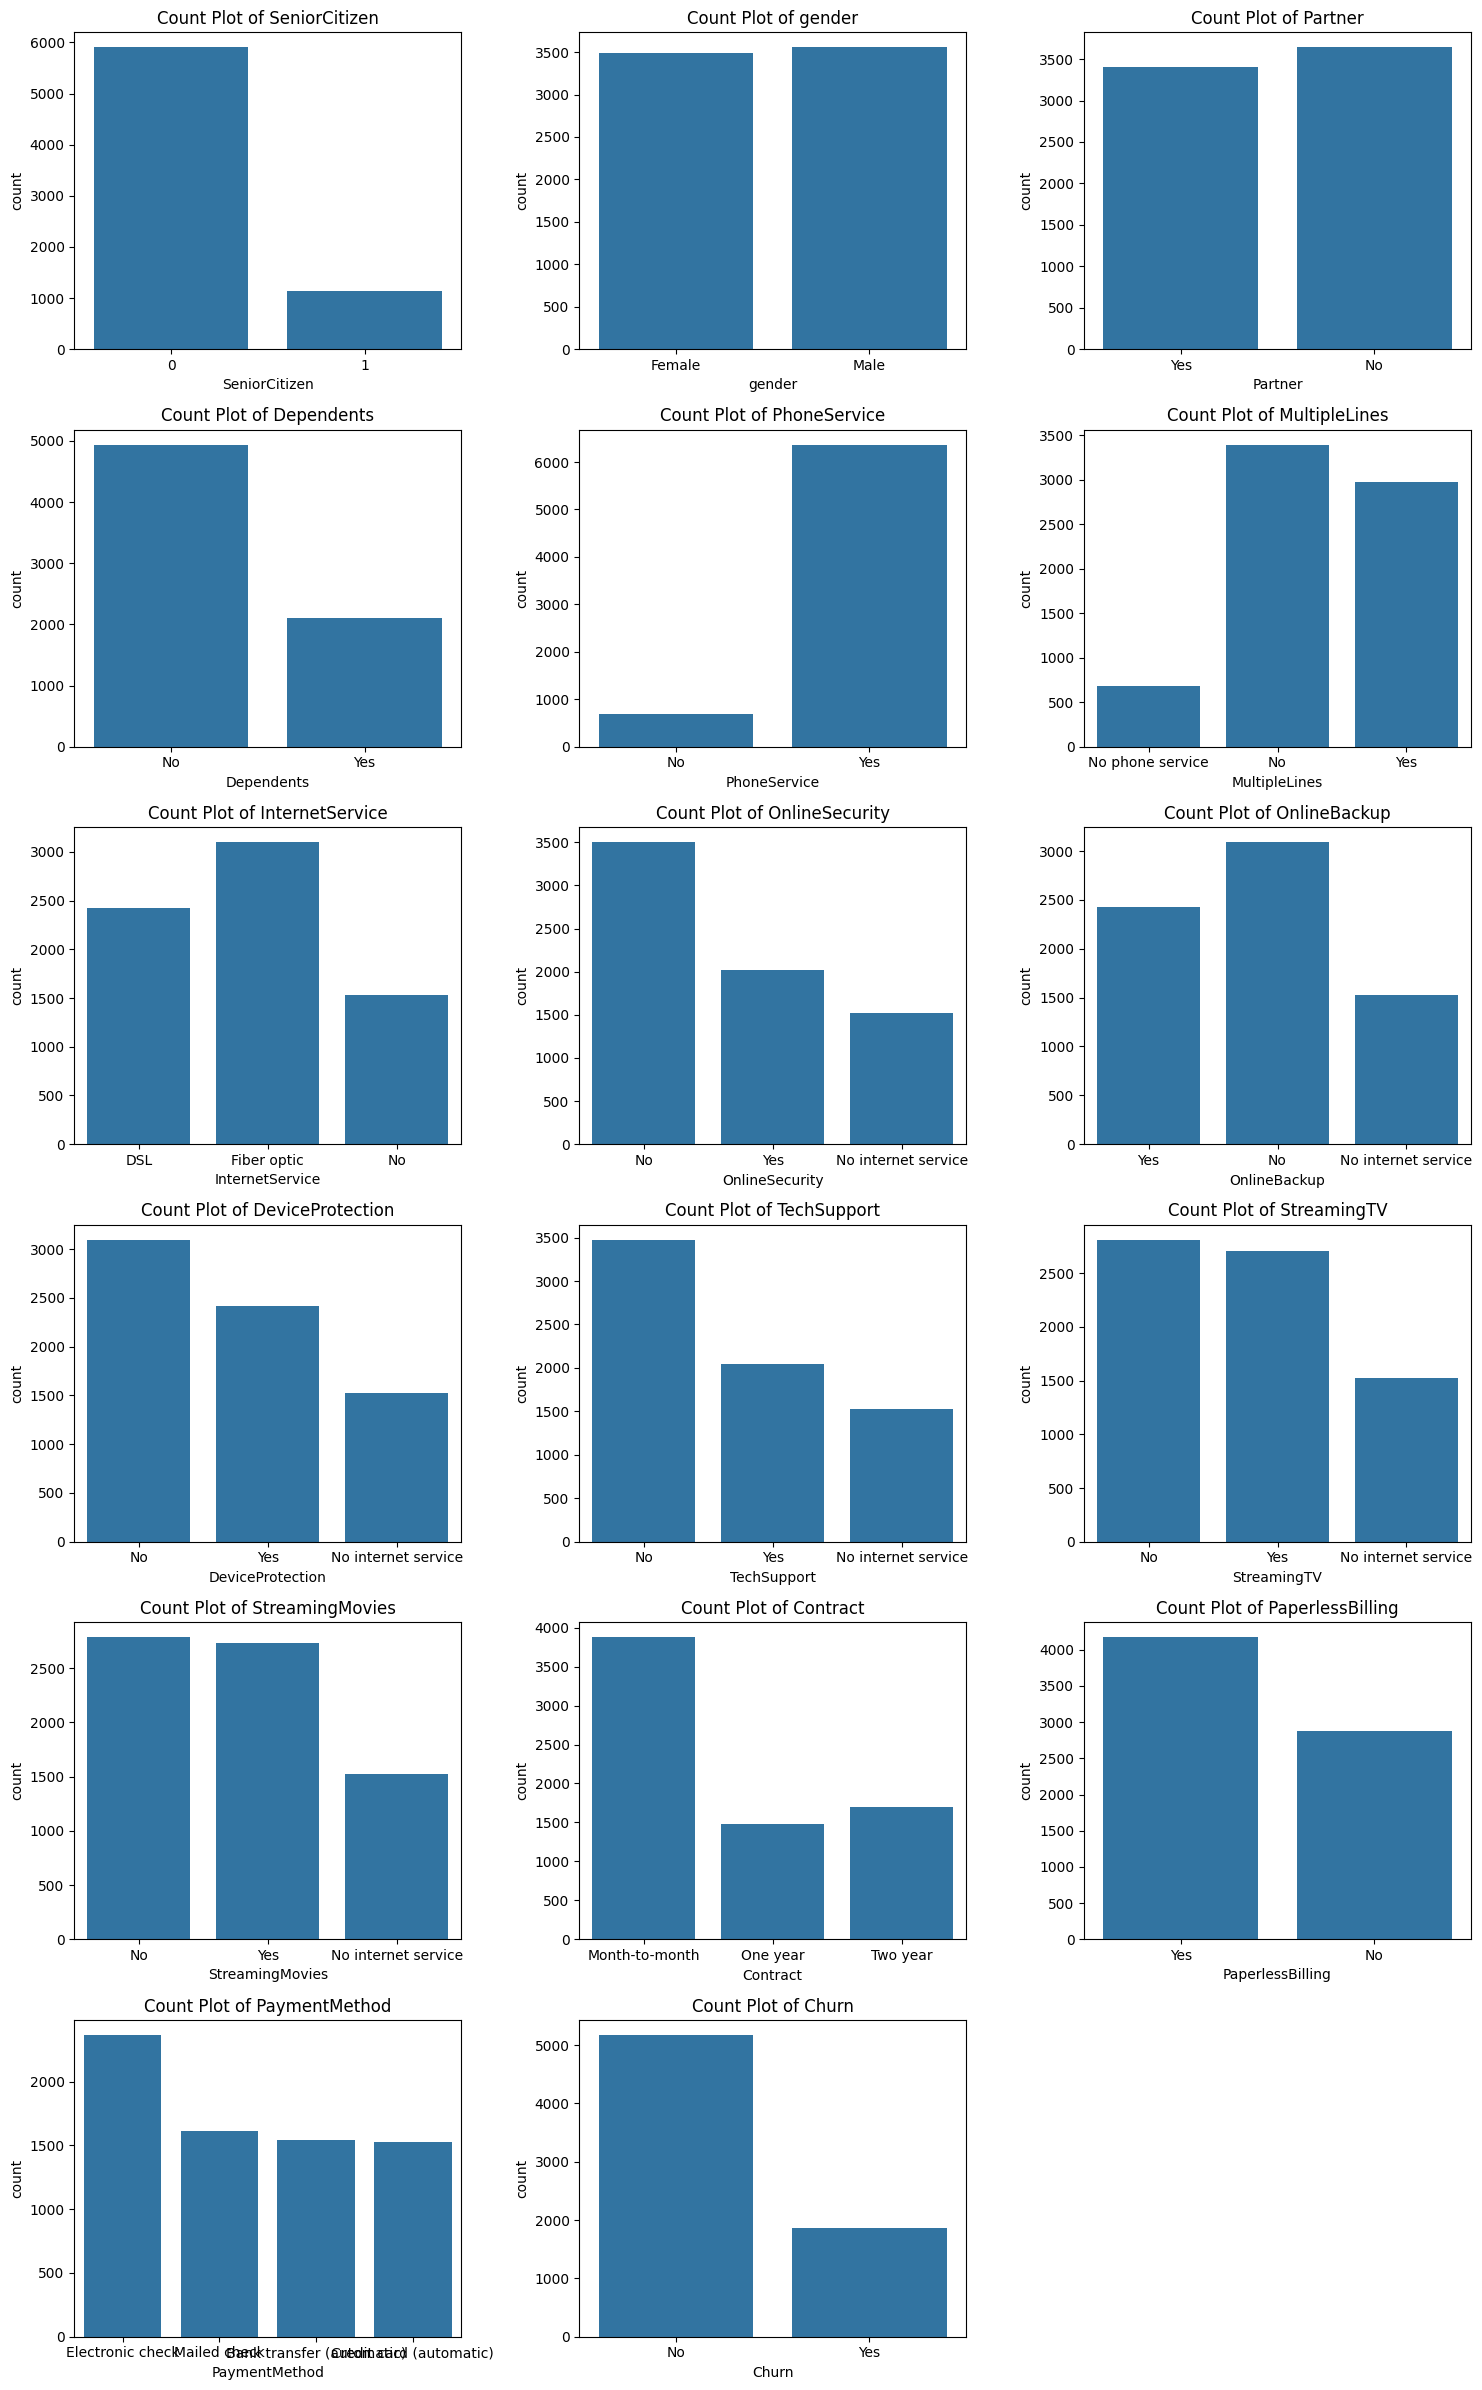

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3
n_rows = math.ceil(len(object_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# If axes is 2D
for i, col in enumerate(object_cols):
    r, c = divmod(i, n_cols)
    sns.countplot(x=df[col], ax=axes[r][c])
    axes[r][c].set_title(f"Count Plot of {col}")

# Hide unused subplots
for j in range(i + 1, n_rows * n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r][c])

plt.tight_layout()
plt.show()


**DATA PROCESSING**

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [ ]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/tmp/ipython-input-37-2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label encoding of categorical fetaures

In [ ]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Traianing and test data split**

In [ ]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [ ]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.shape)

(5634,)


In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_smote.shape)

(8276,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**5. Model Training**

Training with default hyperparameters

In [ ]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

Random Forest gives the highest accuracy compared to other models with default parameters

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


## Classifying Customers: At Risk, Loyal & Dormant

In [ ]:
X = df.drop(columns=['Churn']).copy()

for col, enc in encoders.items():
    # only transform if this column is truly categorical and seen by the encoder
    if col in X.columns and X[col].dtype == object:
        X[col] = enc.transform(X[col])


In [ ]:
print(df.columns.tolist())


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
with open('customer_churn_model.pkl', 'rb') as f:
    obj = pickle.load(f)

print(type(obj))
if isinstance(obj, dict):
    print("Keys in model dict:", obj.keys())


<class 'dict'>
Keys in model dict: dict_keys(['model', 'features_names'])


In [ ]:
import pickle
import pandas as pd

# load the dict and extract the classifier
with open('customer_churn_model.pkl', 'rb') as f:
    saved = pickle.load(f)
clf = saved['model']

with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

X = df.drop(columns=['Churn']).copy()
for col, enc in encoders.items():
    if col in X.columns and X[col].dtype == object:
        X[col] = enc.transform(X[col])

df['churn_prob'] = clf.predict_proba(X)[:, 1]

def segment_customer(p):
    if p >= 0.6:
        return 'At Risk'
    elif p <= 0.2:
        return 'Loyal'
    else:
        return 'Dormant'

df['segment'] = df['churn_prob'].apply(segment_customer)

print(df[['churn_prob', 'segment']].head())
print(df['segment'].value_counts())


   churn_prob  segment
0        0.22  Dormant
1        0.00    Loyal
2        0.83  At Risk
3        0.02    Loyal
4        0.93  At Risk
segment
Loyal      4255
At Risk    1768
Dormant    1020
Name: count, dtype: int64


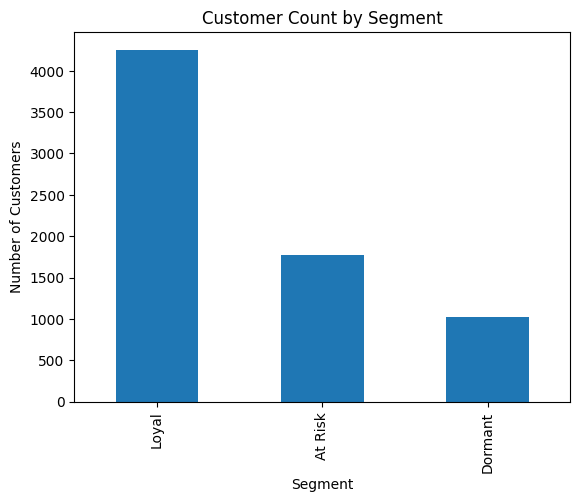

In [ ]:
import matplotlib.pyplot as plt

df['segment'].value_counts().plot(kind='bar')
plt.title('Customer Count by Segment')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.show()


In [ ]:
seg_summary = df.groupby('segment')[
    ['tenure','MonthlyCharges','TotalCharges']
].agg(['mean','median']).round(2)
print(seg_summary)


        tenure        MonthlyCharges        TotalCharges         
          mean median           mean median         mean   median
segment                                                          
At Risk  17.25    9.0          74.62  79.75      1477.66   655.88
Dormant  22.27   15.5          73.43  78.82      1931.75  1113.72
Loyal    41.08   44.0          58.59  59.75      2696.42  1798.65


In [ ]:
# Categorical features to profile
cats = ['gender','SeniorCitizen','Contract','PaymentMethod','InternetService',
        'OnlineSecurity','TechSupport']

for col in cats:
    print(f"\n{col} distribution by segment:")
    display(df.pivot_table(index=col, columns='segment',
                           values='Churn', aggfunc='count').fillna(0))



gender distribution by segment:


segment,At Risk,Dormant,Loyal
gender,,,
0,903,538,2047
1,865,482,2208



SeniorCitizen distribution by segment:


segment,At Risk,Dormant,Loyal
SeniorCitizen,,,
0,1313,801,3787
1,455,219,468



Contract distribution by segment:


segment,At Risk,Dormant,Loyal
Contract,,,
0,1589,894,1392
1,146,96,1231
2,33,30,1632



PaymentMethod distribution by segment:


segment,At Risk,Dormant,Loyal
PaymentMethod,,,
0,236,167,1141
1,220,164,1138
2,1035,505,825
3,277,184,1151



InternetService distribution by segment:


segment,At Risk,Dormant,Loyal
InternetService,,,
0,411,298,1712
1,1252,653,1191
2,105,69,1352



OnlineSecurity distribution by segment:


segment,At Risk,Dormant,Loyal
OnlineSecurity,,,
0,1420,766,1312
1,105,69,1352
2,243,185,1591



TechSupport distribution by segment:


segment,At Risk,Dormant,Loyal
TechSupport,,,
0,1401,729,1343
1,105,69,1352
2,262,222,1560


In [ ]:
print(df['Churn'].unique())


[0 1]


In [ ]:
churn_rates_pct = (df.groupby('segment')['Churn'].mean() * 100).round(1)
print(churn_rates_pct)


segment
At Risk    93.6
Dormant    17.1
Loyal       1.0
Name: Churn, dtype: float64


In [ ]:
df.to_csv('customer_churn_with_segments.csv', index=False)


**6. Model Evaluation**

In [ ]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7785663591199432
Confsuion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

### 6.1 Model Explainability using SHAP

To better understand how individual features affect churn prediction, we use SHAP (SHapley Additive exPlanations) to visualize feature importance and their impact on model output.


In [ ]:
import pickle

# Load the full dictionary from the .pkl file
with open('customer_churn_model.pkl', 'rb') as f:
    model_bundle = pickle.load(f)

# Check what keys are inside
print(model_bundle.keys())


dict_keys(['model', 'features_names'])


In [ ]:
model = model_bundle['model']


In [ ]:
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
print(type(shap_values))
print(len(shap_values))
print(np.array(shap_values).shape)


<class 'numpy.ndarray'>
100
(100, 19, 2)


/tmp/ipython-input-77-871200180.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_class1, X_sample)


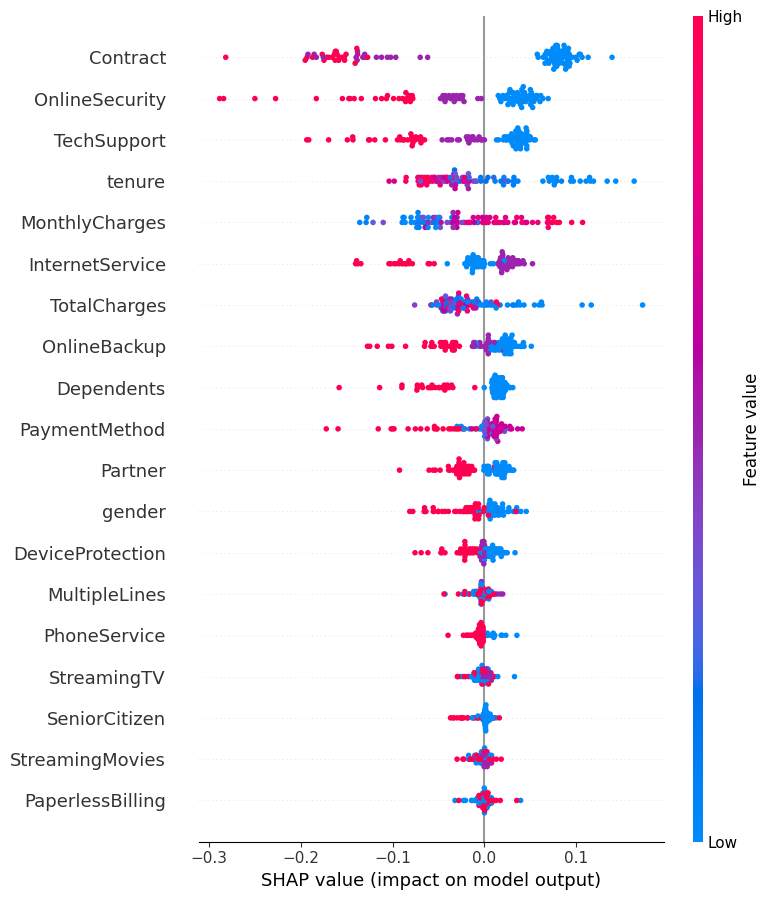

In [ ]:
# Extract SHAP values for class 1 (churn)
shap_class1 = shap_values[:, :, 1]

# Plot
shap.summary_plot(shap_class1, X_sample)


**7. Load the saved  model and  build a Predictive System**

In [ ]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.78 0.22]]


In [ ]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

**FINAL RECOMEDATIONS**

**1. Target High-Risk Customers:**
Segment Identified: At Risk

Profile: High complaint rate, low recharge frequency, reduced call duration.

**Actionable Strategies:**
Launch personalized retention offers (discounted plans, loyalty rewards).
Assign dedicated customer support for quick complaint resolution.
Proactively reach out via SMS/calls based on early churn signals.

**2. Reward Loyal Customers:**Segment Identified: Loyal

Profile: High recharge frequency, consistent usage, no complaints.

**Actionable Strategies:**
Introduce a tiered loyalty program (gold/silver/bronze).
Offer referral bonuses to encourage customer advocacy.
Provide early access to new plans/features.

**3. Re-Engage Dormant Customers:**
Segment Identified: Dormant

Profile: No recent activity, long time since last recharge.

**Actionable Strategies:**
Send automated win-back campaigns (e.g., 1-month free recharge).
Use SMS/WhatsApp to re-market based on past usage patterns.
Offer flexible, low-cost plans to ease re-entry.

**4. Data-Driven Interventions**
Use Model Insights (ELI5/SHAP):
Focus on key churn predictors like:
Complaint frequency
Recharge intervals
Call drop rates
Automate churn risk scoring and alerting system.

**5. Improve Operational Processes**
Customer Support: Reduce complaint resolution time by 30%.
Network Quality: Invest in high-complaint zones for better coverage.
Billing Transparency: Simplify recharge and usage reports.

**6. Monitor and Iterate**
Regularly retrain the churn model with fresh data.
A/B test retention campaigns to identify what works.
Use dashboards to track churn KPIs and segment performance.